In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

mpl.rcParams['figure.figsize'] = (30, 10)
mpl.rcParams['axes.grid'] = False

In [33]:
df= pd.read_pickle('dataset/raw/pms_occupancy.pkl')

In [34]:
df = df[df['HotelId'] == 199]

In [35]:
df['TargetDate'] = pd.to_datetime(df['TargetDate'],format="%Y-%m-%d")
df['SnapshotDateTime'] = pd.to_datetime(df['SnapshotDateTime'].dt.date,format="%Y-%m-%d")

In [36]:
df['DBA'] = (df['TargetDate']-df['SnapshotDateTime']).astype('timedelta64[D]')

In [37]:
df.head(10)

,HotelId,TargetDate,SnapshotDateTime,LeadTime,Definitive,Rooms,DBA
8791904,199,2020-09-15,2020-09-01,13.916667,0,133,14.0
8791905,199,2020-09-15,2020-08-31,15.000000,0,133,15.0
8791906,199,2020-09-15,2020-08-30,15.875000,0,133,16.0
8791907,199,2020-09-15,2020-08-29,16.875000,0,133,17.0
8791908,199,2020-09-15,2020-08-28,18.000000,0,133,18.0
8791909,199,2020-09-15,2020-08-27,18.916667,0,133,19.0
8791910,199,2020-09-15,2020-08-26,19.875000,0,133,20.0
8791911,199,2020-09-15,2020-08-25,20.875000,0,133,21.0
8791912,199,2020-09-15,2020-08-24,21.875000,0,133,22.0
8791913,199,2020-09-15,2020-08-23,22.916667,0,133,23.0


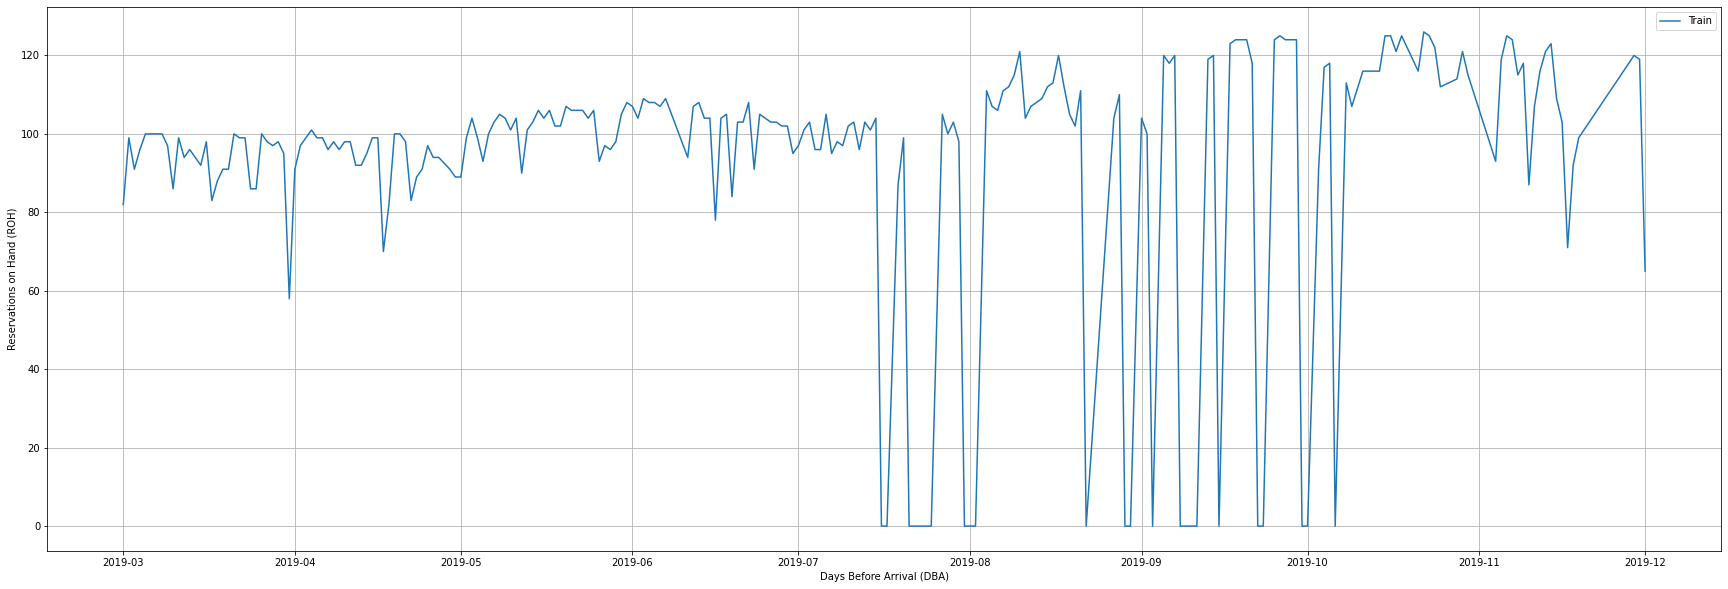

In [45]:
dx = df[(df['TargetDate']>='2019-03')&(df['TargetDate']<='2019-12')&(df['DBA']==0)]
plt.plot(dx.TargetDate, dx['Definitive'], label='Train')
plt.xlabel('Days Before Arrival (DBA)')
plt.ylabel('Reservations on Hand (ROH)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<AxesSubplot:>

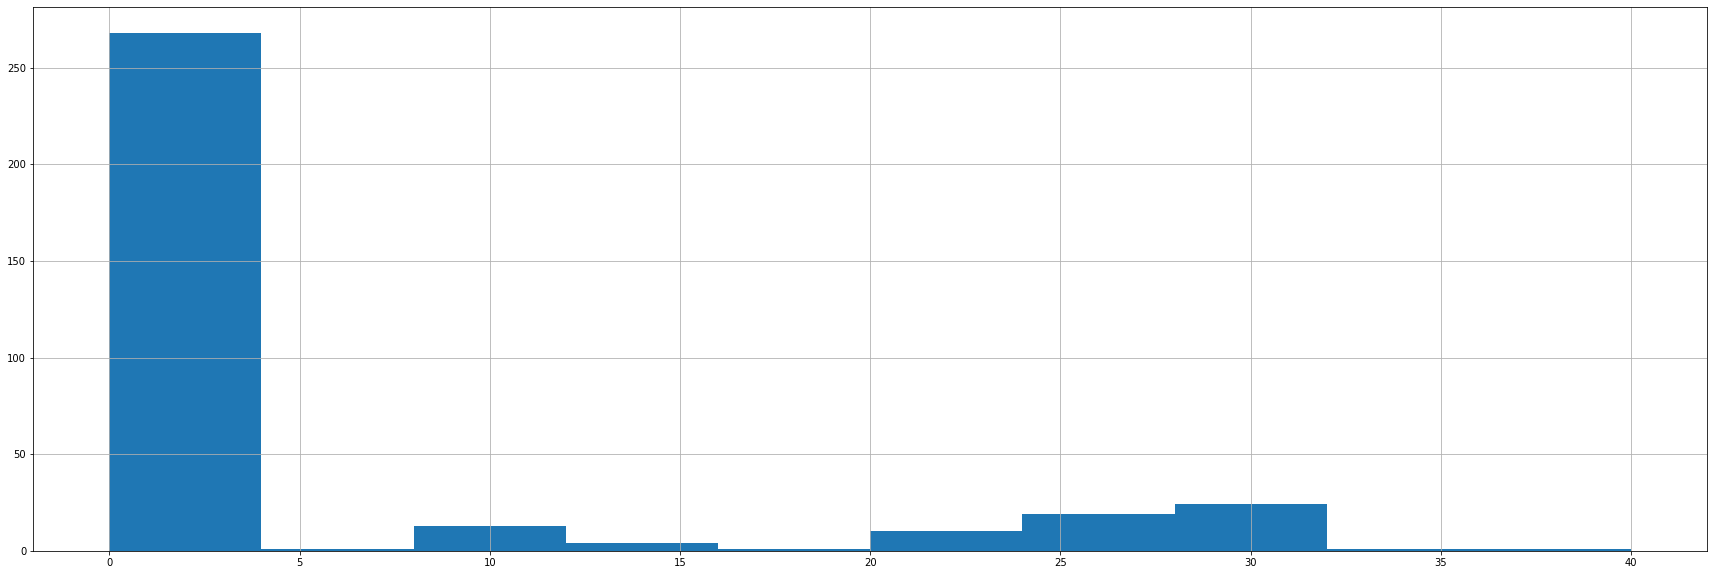

In [22]:
dx['Definitive'].hist()